In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Load the dataset
data_url = 'https://archive.ics.uci.edu/static/public/17/data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
print(df.head())

         ID  radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    842302    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    842517    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2  84300903    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3  84348301    11.42     20.38       77.58   386.1      0.14250       0.28390   
4  84358402    20.29     14.34      135.10  1297.0      0.10030       0.13280   

   concavity1  concave_points1  symmetry1  ...  texture3  perimeter3   area3  \
0      0.3001          0.14710     0.2419  ...     17.33      184.60  2019.0   
1      0.0869          0.07017     0.1812  ...     23.41      158.80  1956.0   
2      0.1974          0.12790     0.2069  ...     25.53      152.50  1709.0   
3      0.2414          0.10520     0.2597  ...     26.50       98.87   567.7   
4      0.1980          0.10430     0.1809  ...     16.67      152.20  1575.0   

   smoothness3  compactness3  co

In [9]:
# Load the dataset into a pandas DataFrame
data = df


In [10]:
# Encode the 'Diagnosis' column
label_encoder = LabelEncoder()
data['Diagnosis'] = label_encoder.fit_transform(data['Diagnosis'])


In [11]:
# Split the data into features and target
X = data.drop(columns=['ID', 'Diagnosis'])
y = data['Diagnosis']


In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Standardize the feature variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [14]:
# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier()

In [15]:
# Define hyperparameters to tune
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

In [16]:
# Use GridSearchCV to find the best hyperparameters with cv=2
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=2, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 288 candidates, totalling 576 fits


c:\Users\drake\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
144 fits failed out of a total of 576.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
84 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\drake\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\drake\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\drake\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)

In [17]:
# Get the best model
best_model = grid_search.best_estimator_

In [18]:
# Evaluate the best model
y_pred = best_model.predict(X_test)
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best Parameters: {'criterion': 'entropy', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2}
Accuracy: 0.9824561403508771
[[71  0]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [19]:
# Print feature importance
feature_importances = best_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

print(importance_df)

               Feature  Importance
3                area1    0.500673
7      concave_points1    0.219038
21            texture3    0.084711
6           concavity1    0.065863
18           symmetry2    0.031435
29  fractal_dimension3    0.026942
10             radius2    0.016819
26          concavity3    0.014887
22          perimeter3    0.012762
13               area2    0.011372
28           symmetry3    0.010877
20             radius3    0.004619
25        compactness3    0.000000
23               area3    0.000000
24         smoothness3    0.000000
27     concave_points3    0.000000
19  fractal_dimension2    0.000000
0              radius1    0.000000
17     concave_points2    0.000000
16          concavity2    0.000000
1             texture1    0.000000
14         smoothness2    0.000000
12          perimeter2    0.000000
11            texture2    0.000000
9   fractal_dimension1    0.000000
8            symmetry1    0.000000
5         compactness1    0.000000
4          smoothnes

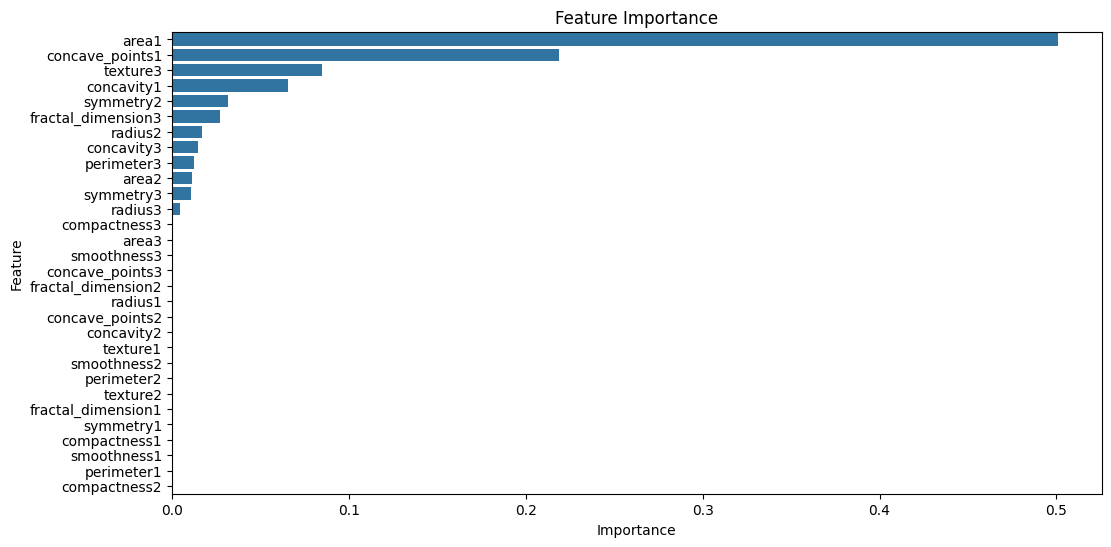

In [20]:
# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()
